In [1]:
import numpy as np
import pandas as pd
from mlp import MultiLayerNeuralNetwork

## Testing ANN on Regression

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv("./datasets/heart_data.csv")
df.head()
X_train, X_test, Y_train, Y_test = train_test_split(
    df.iloc[:, 0:2].values, df.iloc[:, 2].values, test_size=0.3,random_state=2)



Final Minimised Loss : 0.7479514885436875

Training complete!
================================================ :)


0.9652729721645469

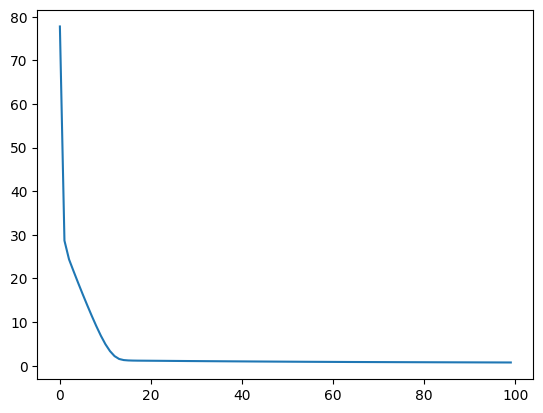

In [3]:
from sklearn.metrics import r2_score
model = MultiLayerNeuralNetwork()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='linear')
model.add_layer(10,activation_function='linear')
model.add_layer(1,activation_function='linear',output_layer=True)
model.compile_model(loss_function='mse',weight_initializer='glorot_uniform',seed=3)
losses=model.fit(X_train, Y_train,learning_rate=0.001,epochs=100,show_loss=False,early_stopping=False)
Y_pred = model.predict(X_test)
plt.plot(model.history['Losses'])
r2_score(Y_test,Y_pred)

## Testing Keras ANN on Regression

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 2ms/step


0.9319862621577272

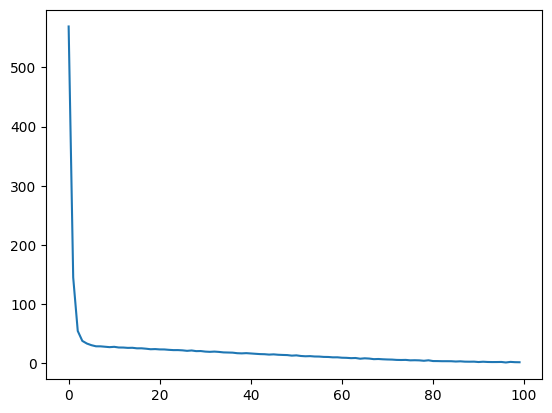

In [4]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
model = Sequential()
initializer = keras.initializers.GlorotUniform(seed=3)
model.add(Dense(10, activation='linear', input_dim=2,kernel_initializer=initializer))
model.add(Dense(10, activation='linear',kernel_initializer=initializer))
model.add(Dense(1, activation='linear',kernel_initializer=initializer))
optimizers=keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(loss='mean_squared_error', metrics=['mse'],optimizer=optimizers)
model.summary()
history = model.fit(X_train, Y_train, epochs=100,verbose=0)
Y_pred = model.predict(X_test)
plt.plot(history.history['loss'])
r2_score(Y_test, Y_pred)


## Testing ANN on Classification

In [5]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv("./datasets/placement.csv")
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
trns = scaler.fit_transform(df.iloc[:, 0:2])
df = pd.DataFrame(
    {'cgpa': trns[:, 0], 'iq': trns[:, 1], 'placement': df['placement']})
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,0:2].values, df.iloc[:,2].values, test_size=0.2,random_state=2)



Final Minimised Loss : 0.046493375752028485

Training complete!
================================================ :)


0.9

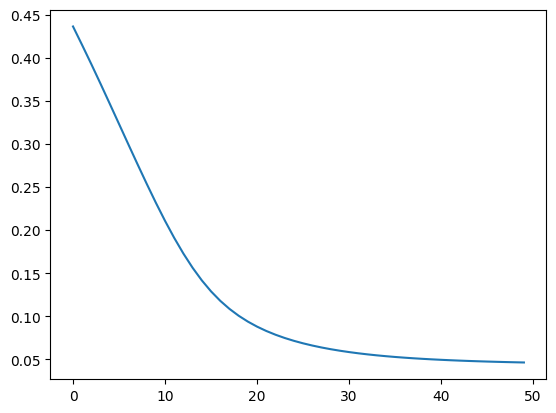

In [7]:
from sklearn.metrics import accuracy_score
model = MultiLayerNeuralNetwork()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='linear')
model.add_layer(10,activation_function='linear')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.add_optimizer('RMSprop')
model.compile_model(loss_function='mse')
losses=model.fit(X_train, Y_train,learning_rate=0.0001,epochs=50,show_loss=False,early_stopping=False)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

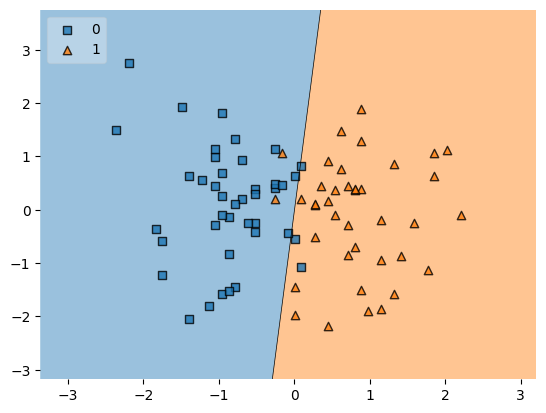

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)


Final Minimised Loss : 0.1504650507385638

Training complete!
================================================ :)


0.9

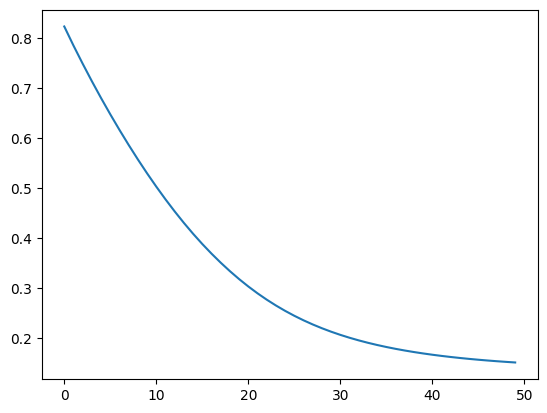

In [9]:
from sklearn.metrics import accuracy_score
model = MultiLayerNeuralNetwork()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='linear')
model.add_layer(10,activation_function='linear')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.add_optimizer('RMSprop')
model.compile_model(loss_function='binary_cross_entropy')
losses=model.fit(X_train, Y_train,learning_rate=0.0001,epochs=50,show_loss=False,early_stopping=False)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

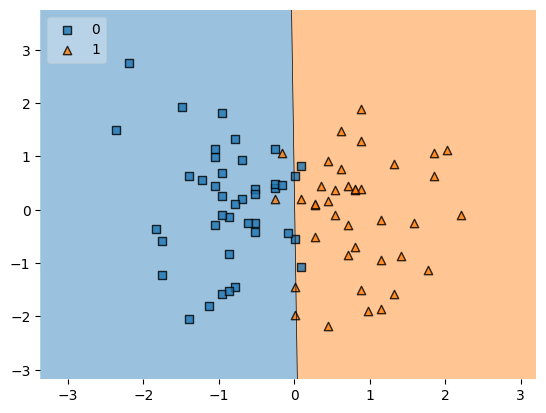

In [10]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)

## Testing Keras ANN on Classification

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 62ms/step


0.9

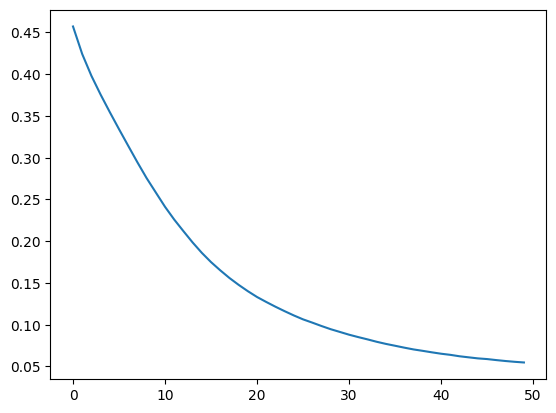

In [11]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
model = Sequential()
initializer = keras.initializers.GlorotUniform(seed=3)
model.add(Dense(10, activation='linear', input_dim=2,kernel_initializer=initializer))
model.add(Dense(10, activation='linear',kernel_initializer=initializer))
model.add(Dense(1, activation='sigmoid',kernel_initializer=initializer))
model.compile(loss='mean_squared_error', metrics=['mse'])
model.summary()
history = model.fit(X_train, Y_train, epochs=50,verbose=0)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(history.history['loss'])
accuracy_score(Y_test, Y_pred)


9600/9600 [==============================] - 12s 1ms/step


<AxesSubplot:>

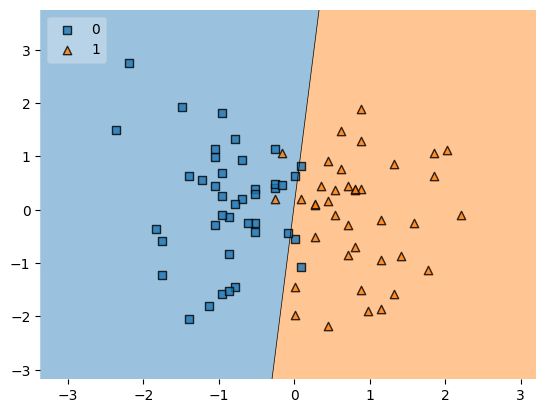

In [12]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)

## Testing ANN on make_moons

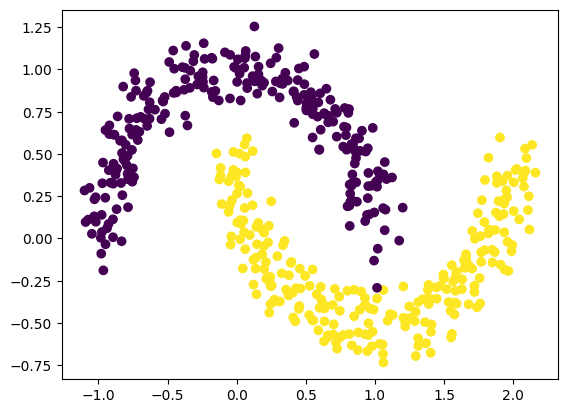

In [13]:
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=500,noise=0.1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)
plt.scatter(X[:,0],X[:,1],c=Y)


Final Minimised Loss : 0.007084638809887656

Training complete!
================================================ :)


1.0

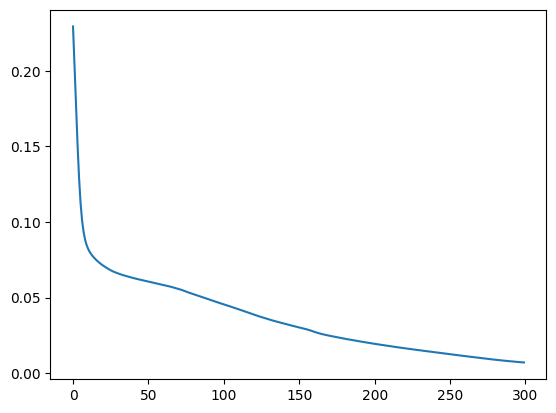

In [14]:
from sklearn.metrics import accuracy_score
model = MultiLayerNeuralNetwork()
model.add_layer(2,input_layer=True)
model.add_layer(30,activation_function='relu')
model.add_layer(30,activation_function='relu')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.add_optimizer('RMSprop')
model.compile_model(loss_function='mse',weight_initializer='glorot_uniform',seed=3)
losses=model.fit(X_train, Y_train,learning_rate=0.0001,epochs=300,show_loss=False,early_stopping=True,patience=3)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

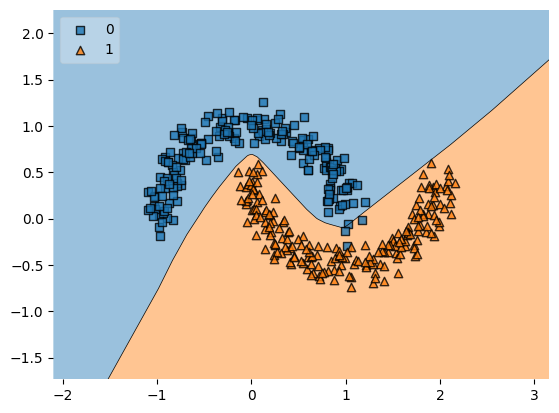

In [15]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)

## Testing ANN on make_circles

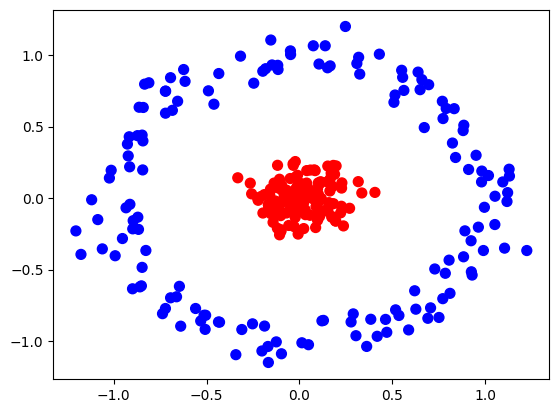

In [16]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
X,Y = make_circles(300, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='bwr')


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)



Final Minimised Loss : 2.074151969406564e-05

Training complete!
================================================ :)


1.0

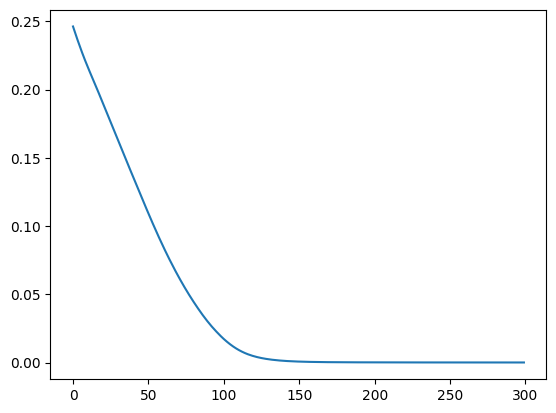

In [18]:
from sklearn.metrics import accuracy_score
model = MultiLayerNeuralNetwork()
model.add_layer(2,input_layer=True)
model.add_layer(10,activation_function='relu')
model.add_layer(10,activation_function='relu')
model.add_layer(1,activation_function='sigmoid',output_layer=True)
model.add_optimizer('RMSprop')
model.compile_model(loss_function='mse',weight_initializer='glorot_uniform',seed=3)
losses=model.fit(X_train, Y_train,learning_rate=0.0001,epochs=300,show_loss=False,early_stopping=True,patience=3)
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred > 0.5, 1, 0)
plt.plot(model.history['Losses'])
accuracy_score(Y_test,Y_pred)

<AxesSubplot:>

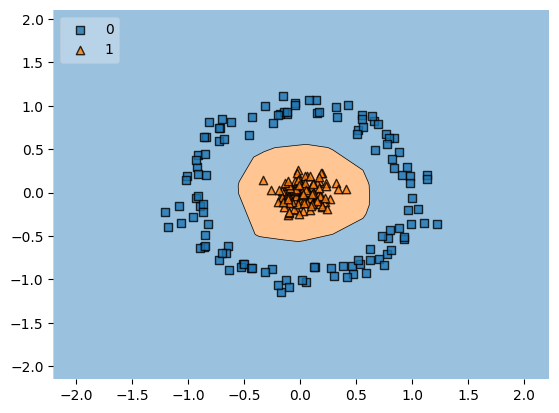

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,model,legend=2)